In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [65]:
df = pd.read_csv("Travel.csv")

In [66]:
df

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [67]:
df.shape

(4888, 20)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [69]:
df['Gender'].replace('Fe Male','Female', inplace = True)

In [70]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [71]:
df.isnull().sum()

,0
CustomerID,0
ProdTaken,0
Age,226
TypeofContact,25
CityTier,0
DurationOfPitch,251
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,45


In [72]:
(df.isnull().sum().sort_values(ascending = False)/len(df))*100

,0
DurationOfPitch,5.135025
MonthlyIncome,4.766776
Age,4.623568
NumberOfTrips,2.864157
NumberOfChildrenVisiting,1.350245
NumberOfFollowups,0.920622
PreferredPropertyStar,0.531915
TypeofContact,0.511457
Designation,0.000000
OwnCar,0.000000


In [73]:
df['DurationOfPitch'].fillna(df['DurationOfPitch'].mean(), inplace = True)

In [74]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [75]:
df['MonthlyIncome'].fillna(df['MonthlyIncome'].mean(), inplace = True)

In [76]:
(df.isnull().sum().sort_values(ascending = False)/len(df))*100

,0
NumberOfTrips,2.864157
NumberOfChildrenVisiting,1.350245
NumberOfFollowups,0.920622
PreferredPropertyStar,0.531915
TypeofContact,0.511457
CustomerID,0.000000
Designation,0.000000
OwnCar,0.000000
PitchSatisfactionScore,0.000000
Passport,0.000000


In [77]:
df.dropna(inplace = True)

In [78]:
df.shape

(4586, 20)

In [79]:
cats = ['ProdTaken', 'CityTier', 'PreferredPropertyStar', 'Passport',
        'OwnCar', 'PitchSatisfactionScore', 'TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
        'MaritalStatus', 'Designation']
nums = ['CustomerID', 'Age', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups',
       'NumberOfTrips',
       'NumberOfChildrenVisiting', 'MonthlyIncome']

In [80]:
cats

['ProdTaken',
 'CityTier',
 'PreferredPropertyStar',
 'Passport',
 'OwnCar',
 'PitchSatisfactionScore',
 'TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

In [81]:
#Univariate Analysis for cats

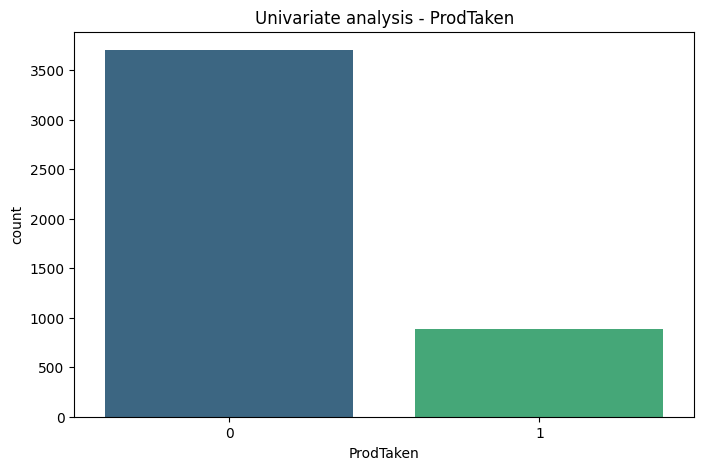

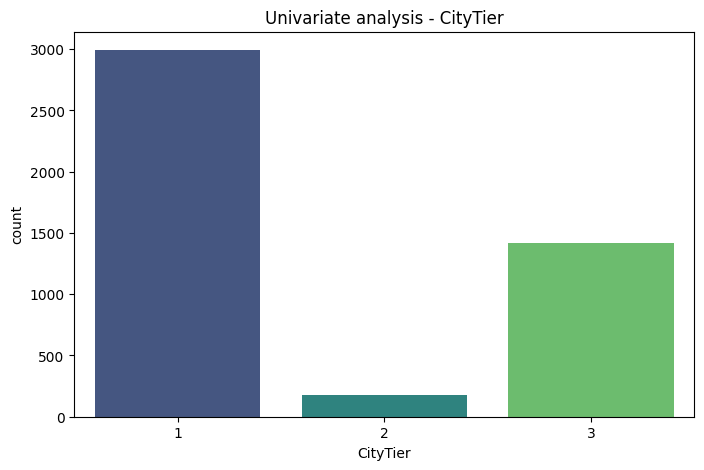

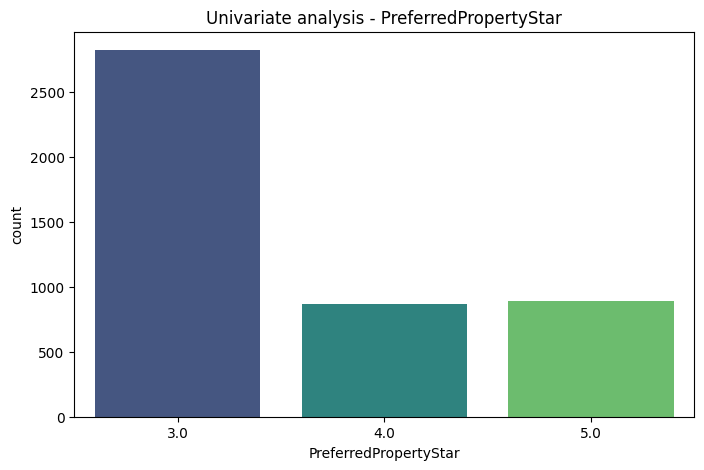

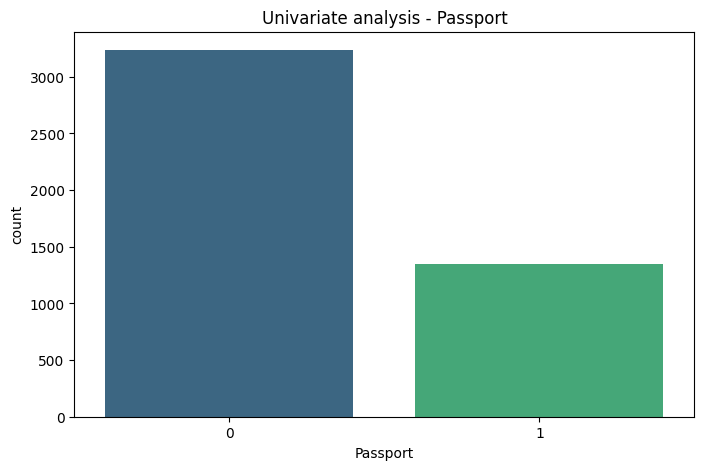

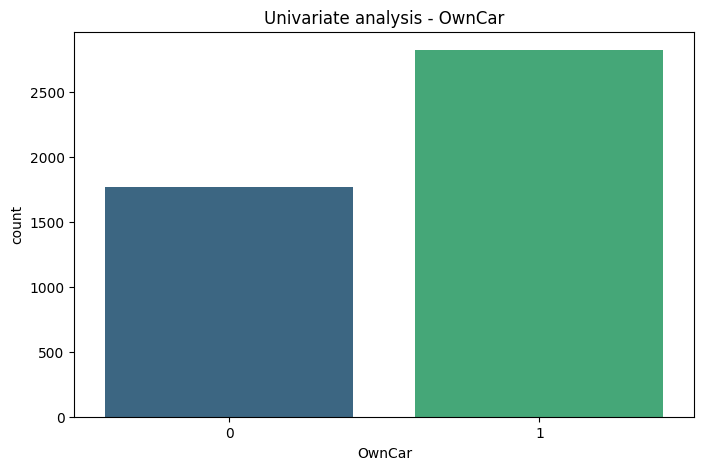

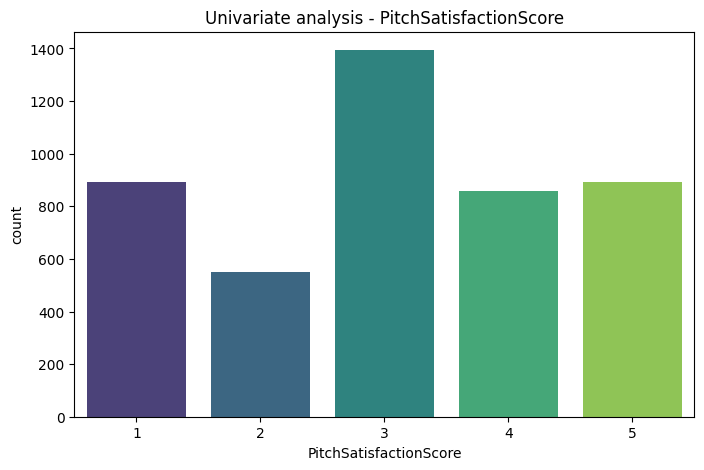

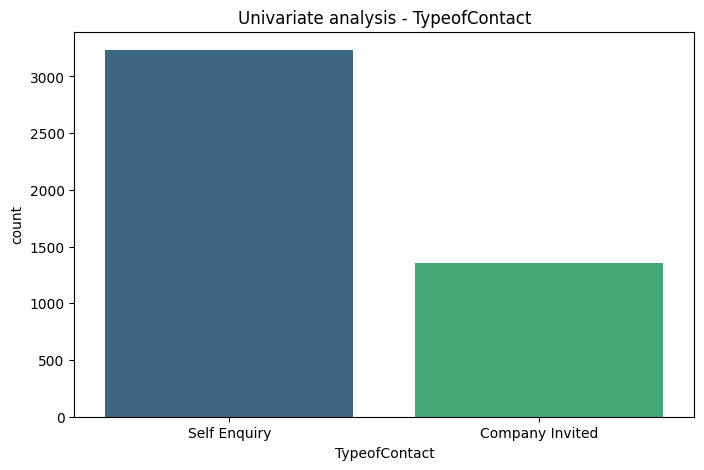

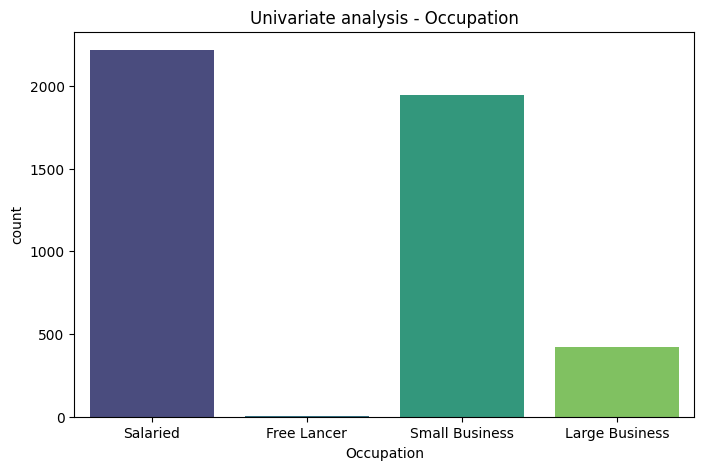

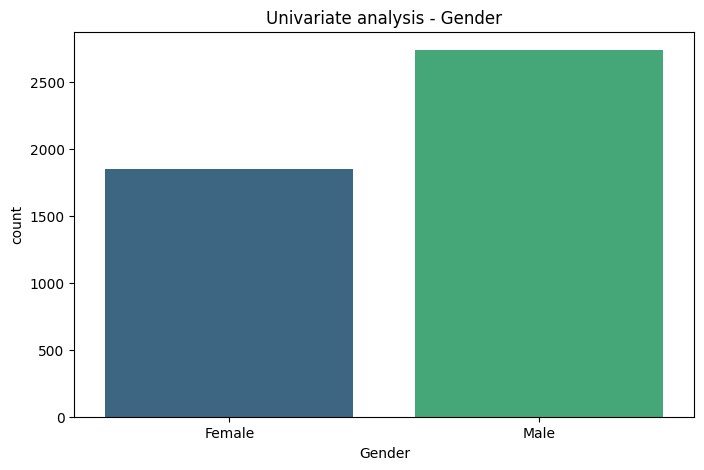

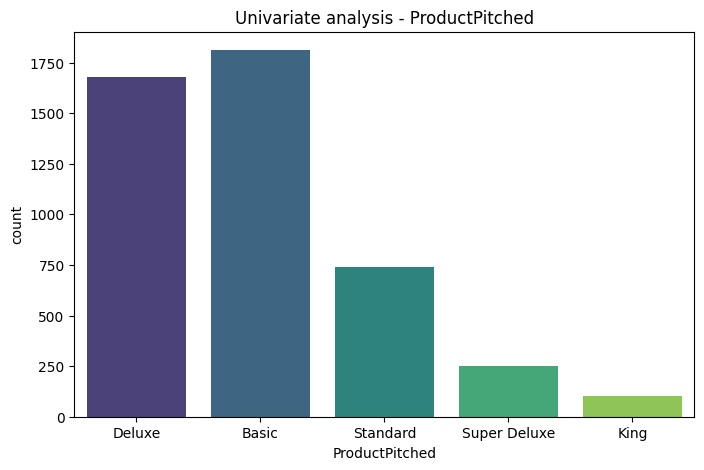

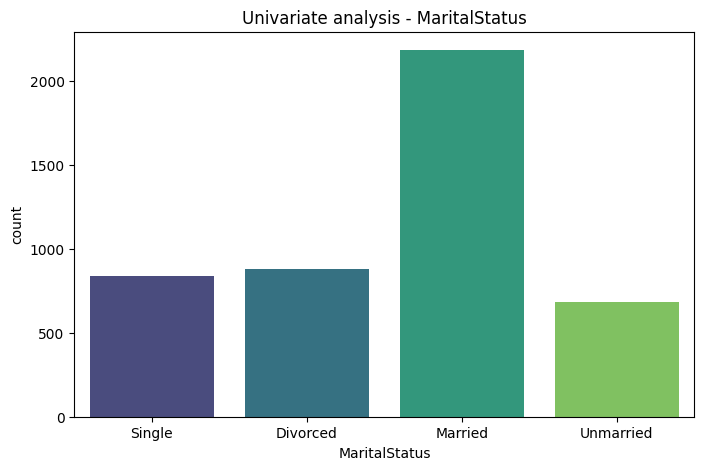

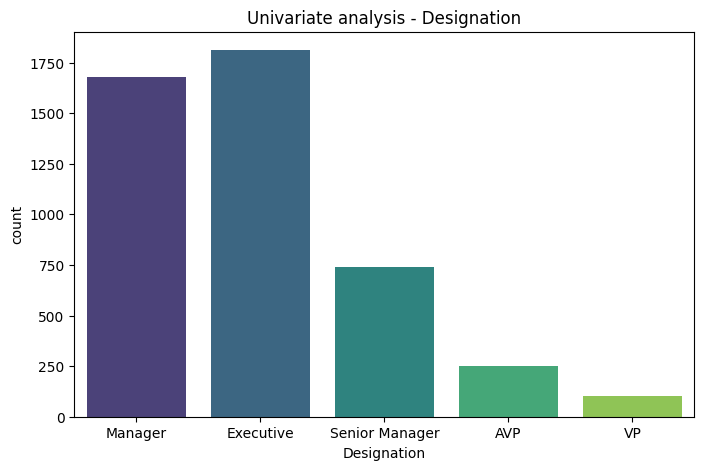

In [82]:
for cat_column in cats:
    plt.figure(figsize = (8,5))
    sns.countplot(x = cat_column, data =df, palette = 'viridis')
    plt.title(f'Univariate analysis - {cat_column}')
    plt.show()

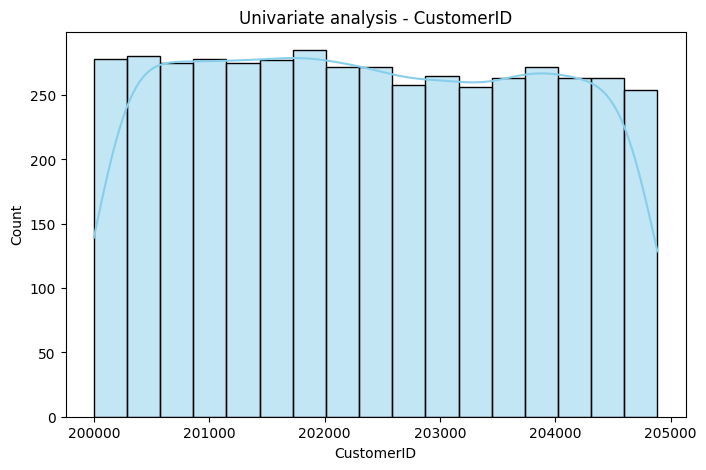

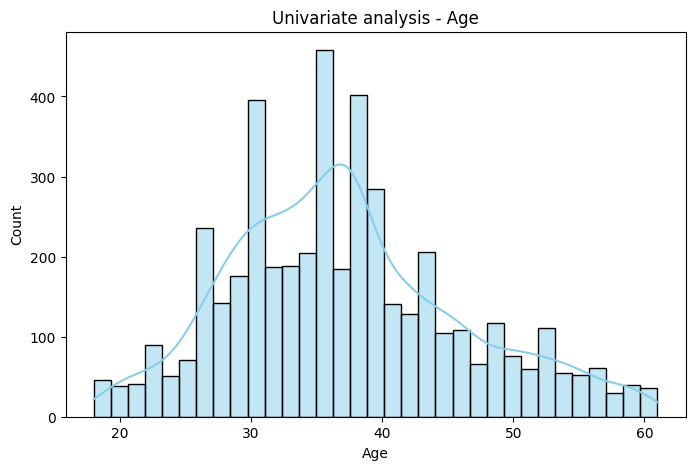

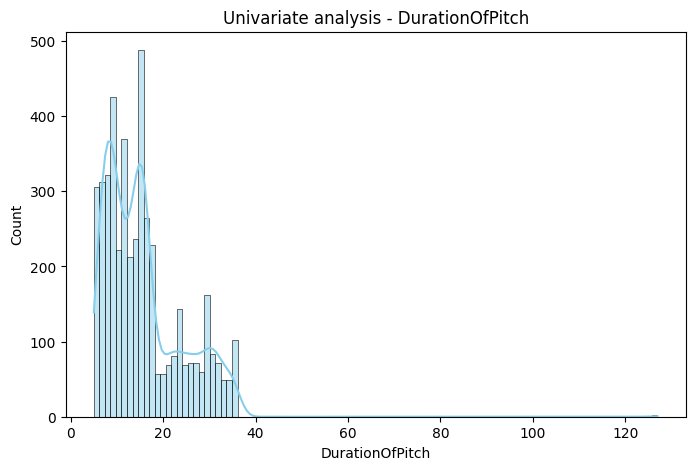

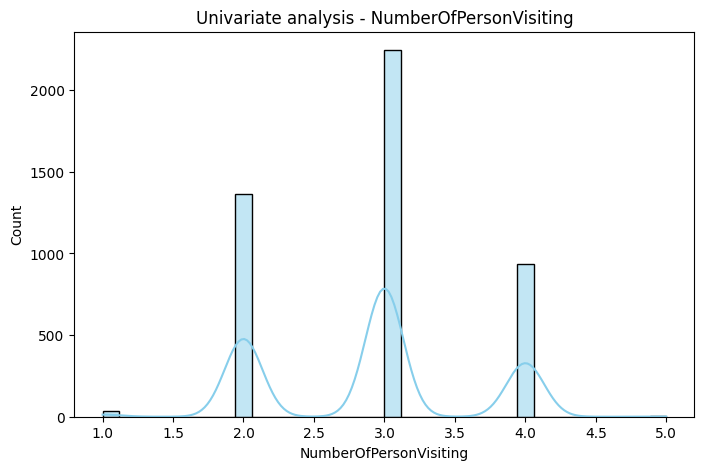

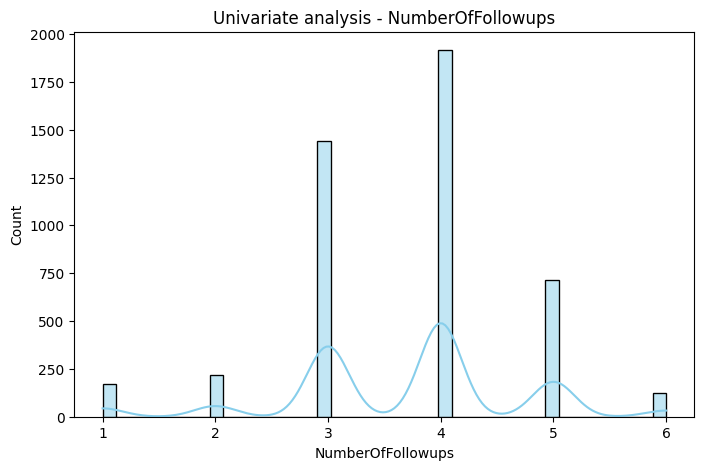

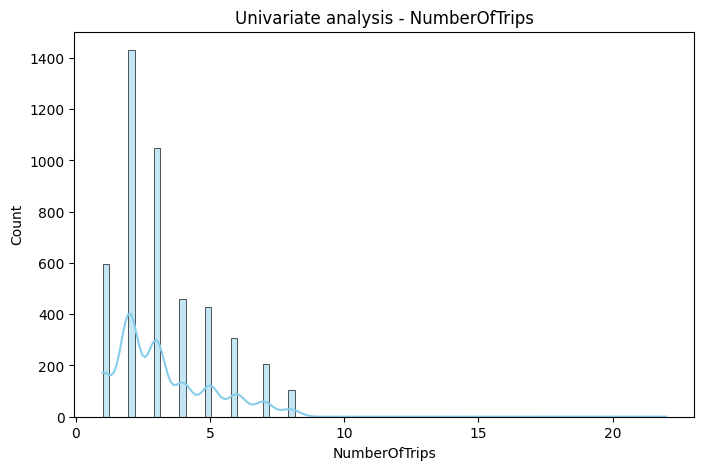

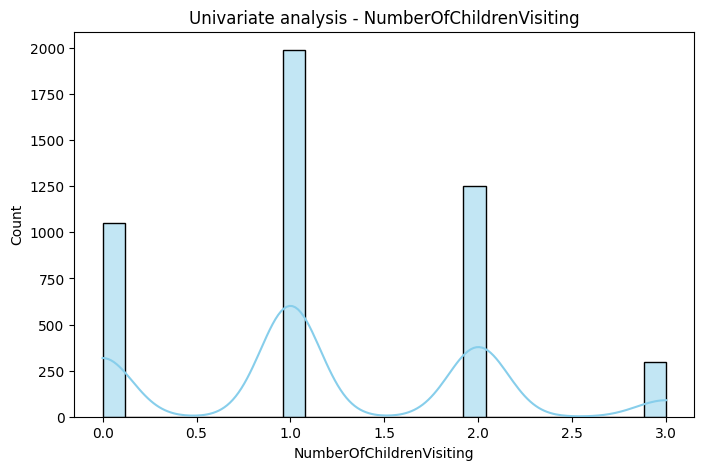

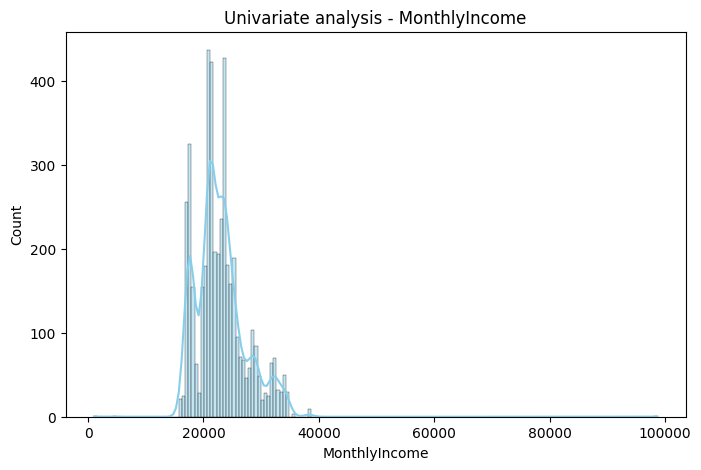

In [83]:
for num_column in nums:
    plt.figure(figsize = (8,5))
    sns.histplot(df[num_column], kde = True, color = 'skyblue')
    plt.title(f'Univariate analysis - {num_column}')
    plt.show()

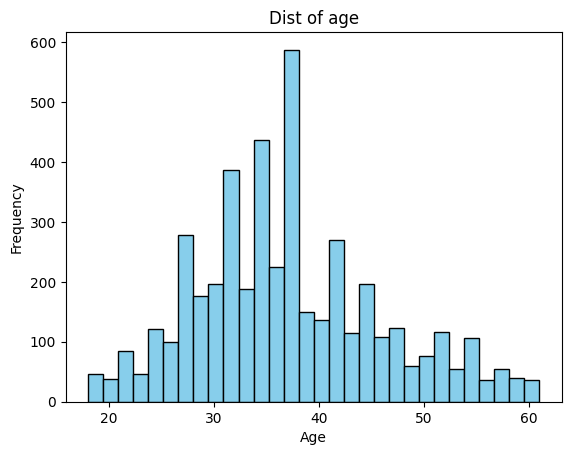

In [84]:
plt.hist(df['Age'].dropna(), bins = 30, color='skyblue', edgecolor = 'black')
plt.title("Dist of age")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='TypeofContact', ylabel='count'>

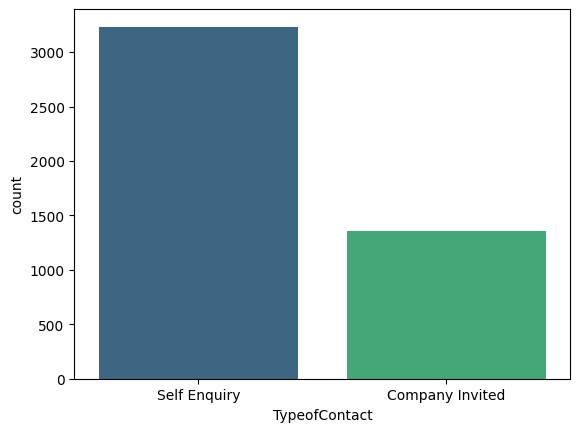

In [85]:
sns.countplot(x = 'TypeofContact', data=df, palette = 'viridis')

In [86]:
df[cats] = df[cats].astype('object')

In [87]:
df[cats].describe().T

,count,unique,top,freq
ProdTaken,4586,2,0,3702
CityTier,4586,3,1,2993
PreferredPropertyStar,4586.0,3.0,3.0,2825.0
Passport,4586,2,0,3236
OwnCar,4586,2,1,2821
PitchSatisfactionScore,4586,5,3,1394
TypeofContact,4586,2,Self Enquiry,3233
Occupation,4586,4,Salaried,2217
Gender,4586,2,Male,2737
ProductPitched,4586,5,Basic,1812


In [88]:
for i in df[cats].columns:
    x = df[i].unique()
    print(f'{i}:{x}')
    print()

ProdTaken:[1 0]

CityTier:[3 1 2]

PreferredPropertyStar:[3.0 4.0 5.0]

Passport:[1 0]

OwnCar:[1 0]

PitchSatisfactionScore:[2 3 5 4 1]

TypeofContact:['Self Enquiry' 'Company Invited']

Occupation:['Salaried' 'Free Lancer' 'Small Business' 'Large Business']

Gender:['Female' 'Male']

ProductPitched:['Deluxe' 'Basic' 'Standard' 'Super Deluxe' 'King']

MaritalStatus:['Single' 'Divorced' 'Married' 'Unmarried']

Designation:['Manager' 'Executive' 'Senior Manager' 'AVP' 'VP']



In [89]:
#Bi-variate analysis

df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

<Axes: xlabel='Age', ylabel='DurationOfPitch'>

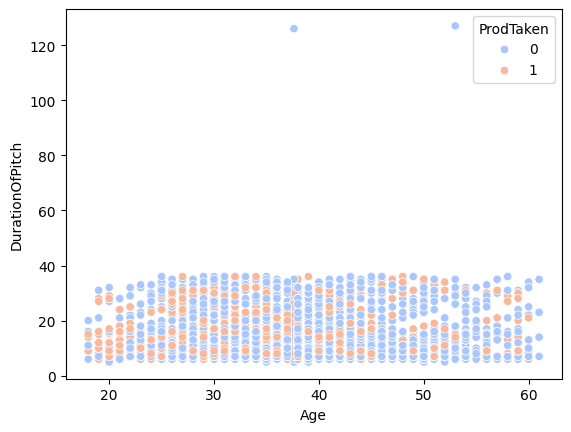

In [90]:
sns.scatterplot(x = 'Age', y = 'DurationOfPitch', data = df, hue = 'ProdTaken', palette = 'coolwarm')

<Axes: xlabel='ProductPitched', ylabel='PitchSatisfactionScore'>

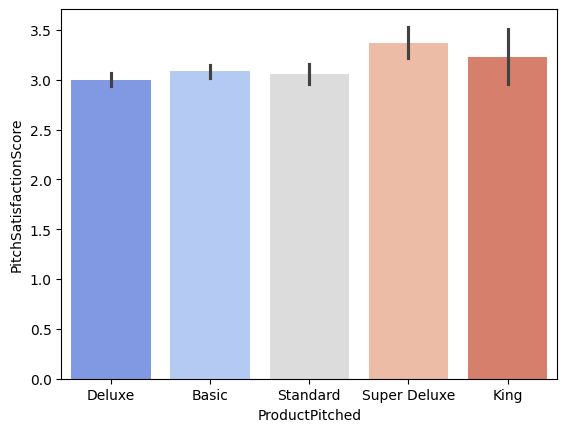

In [91]:
sns.barplot(x = 'ProductPitched', y = 'PitchSatisfactionScore', data=df, palette = 'coolwarm')

<Axes: xlabel='NumberOfFollowups', ylabel='PitchSatisfactionScore'>

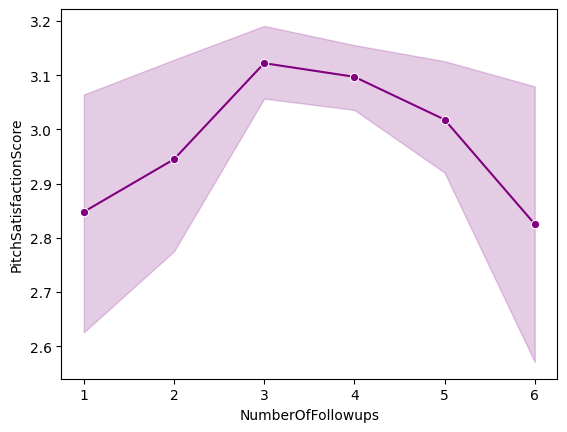

In [92]:
sns.lineplot(x = 'NumberOfFollowups', y = 'PitchSatisfactionScore', data = df, marker = 'o', color = 'purple')

<Axes: xlabel='ProdTaken', ylabel='Age'>

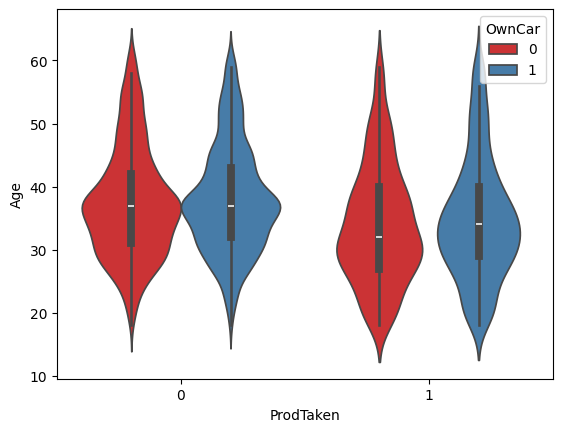

In [93]:
sns.violinplot(x = 'ProdTaken', y='Age', data=df, hue = 'OwnCar', palette = 'Set1')

<Axes: xlabel='Gender', ylabel='Age'>

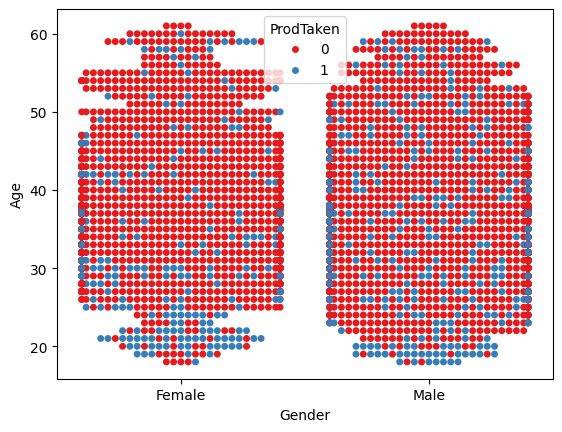

In [94]:
sns.swarmplot(x = 'Gender', y='Age', data=df, hue = 'ProdTaken', palette = 'Set1')

<Axes: >

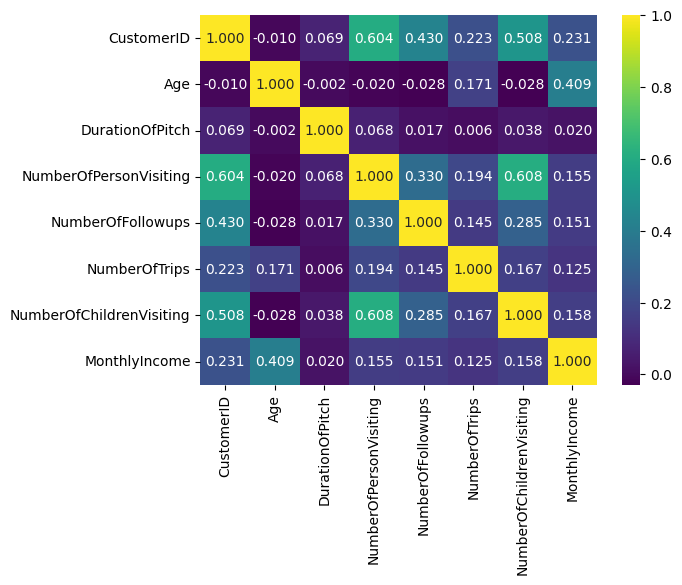

In [95]:
numeric_cols = df.select_dtypes(include = 'number')
sns.heatmap(numeric_cols.corr(), cmap = 'viridis', annot = True, fmt = '.3f')

In [96]:
#Feature Engineering

In [97]:
df.drop('CustomerID', inplace=True, axis = 1)

In [98]:
df.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [99]:
df['TotalVisiting'] = df['NumberOfPersonVisiting'] +df['NumberOfChildrenVisiting']

In [100]:
Categorical = df.select_dtypes(include = 'object')
Numerical = df.select_dtypes(include = 'number')

In [101]:
Categorical.columns

Index(['ProdTaken', 'TypeofContact', 'CityTier', 'Occupation', 'Gender',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'Designation'],
      dtype='object')

In [102]:
Numerical.columns

Index(['Age', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'NumberOfTrips', 'NumberOfChildrenVisiting', 'MonthlyIncome',
       'TotalVisiting'],
      dtype='object')

In [103]:
discrete_features = [feature for feature in Numerical if len(df[feature].unique()) <= 25]
print("Number of Discrete Features are: ", len(discrete_features))

Number of Discrete Features are:  5


In [104]:
#scaling>> numerical features
#categorical>>onehot encoding

In [105]:
# Applies transformers to columns of an array or pandas DataFrame.

# This estimator allows different columns or column subsets of the
# input to be transformed separately and the features generated by each
# transformer will be concatenated to form a single feature space.
# This is useful for heterogeneous or columnar data, to combine several
# feature
# extraction mechanisms or transformations into a single transformer.


from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [113]:
#train test split

from sklearn.model_selection import train_test_split

In [114]:
X = df.drop('ProdTaken', axis =1)
y = df['ProdTaken']

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1)